In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [15]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [16]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [17]:
data["price"] = data.target

In [18]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [20]:
data = pd.DataFrame(data.data, columns = data.feature_names)

In [21]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


<Axes: >

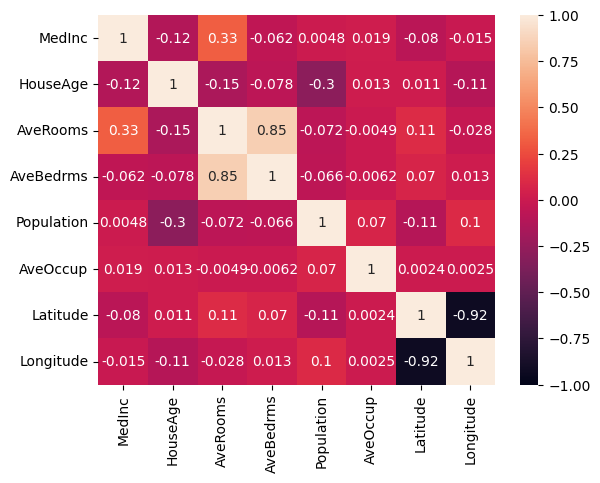

In [23]:
# milticolinarity >> when one feature explained by all other featurs

sns.heatmap(data.corr(), annot = True, vmin = -1, vmax =1)

<Figure size 1000x800 with 0 Axes>

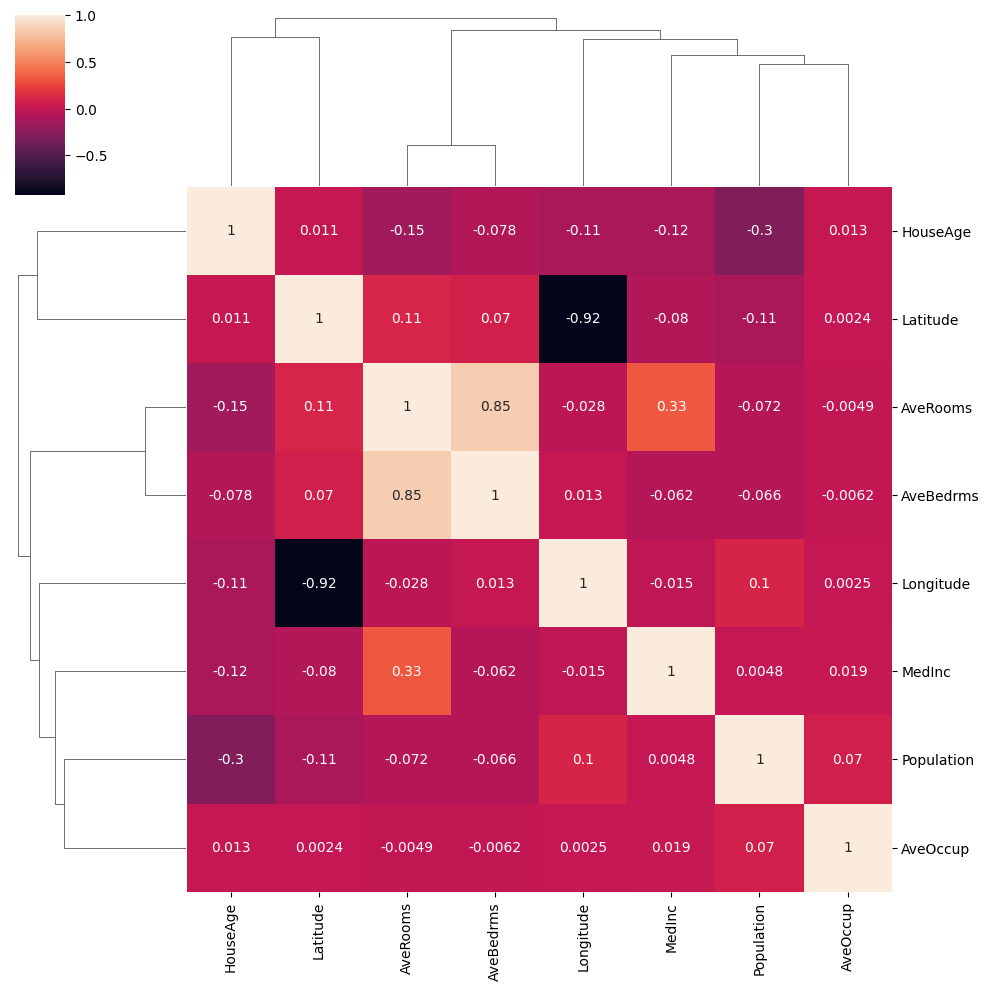

In [24]:
# clustermap >> it shows groups or cluster relationship

plt.figure(figsize = (10, 8))
sns.clustermap(data.corr(), annot = True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
vif = pd.DataFrame()
type(vif)

pandas.core.frame.DataFrame

In [29]:
vif['features'] = data.columns

In [30]:
vif

,features
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude


In [34]:
vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

In [35]:
vif

,features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [39]:
df1 = data.copy()

In [44]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43


In [45]:
vif

,features,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
2,AveRooms,45.993601
3,AveBedrms,43.590314
4,Population,2.935745
5,AveOccup,1.095243
6,Latitude,559.874071
7,Longitude,633.711654


In [51]:
vif = pd.DataFrame()
vif['featurea'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [52]:
vif

,featurea,VIF
0,MedInc,9.865861
1,HouseAge,6.880512
2,AveRooms,42.192223
3,AveBedrms,39.768396
4,Population,2.793169
5,AveOccup,1.094908
6,Latitude,22.498755


In [53]:
df2 = df1.drop("AveRooms", axis = 1, inplace = True)

In [57]:
vif = pd.DataFrame()
vif["feature"] = df1.columns
vif["VIF"]= [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

In [58]:
vif

,feature,VIF
0,MedInc,5.036342
1,HouseAge,6.660725
2,AveBedrms,6.430073
3,Population,2.752356
4,AveOccup,1.094801
5,Latitude,21.922515


In [62]:
x = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [60]:
x

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [63]:
y

,Latitude
0,37.88
1,37.86
2,37.85
3,37.85
4,37.85
...,...
20635,39.48
20636,39.49
20637,39.43
20638,39.43


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [66]:
X_train

,MedInc,HouseAge,AveBedrms,Population,AveOccup
15961,3.1908,52.0,1.014184,879.0,3.117021
1771,3.6094,42.0,0.957096,971.0,3.204620
16414,2.6250,16.0,1.666667,20.0,3.333333
5056,1.5143,34.0,1.149526,3538.0,2.580598
8589,7.3356,38.0,1.057325,750.0,2.388535
...,...,...,...,...,...
10955,1.7823,17.0,1.087156,1079.0,2.474771
17289,8.5608,42.0,1.011538,753.0,2.896154
5192,1.1326,42.0,1.006826,775.0,2.645051
12172,2.6322,10.0,0.951782,1323.0,2.773585


In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 5), (4128, 5), (16512,), (4128,))

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model = LinearRegression()

In [73]:
model

LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [76]:
model.coef_

array([-8.65451637e-02, -4.93706704e-03,  2.34806529e-01, -2.10608837e-04,
        2.94468082e-03])

In [77]:
model.intercept_

36.14174306248438

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred

array([35.69170986, 35.79872916, 35.49306517, ..., 35.81978633,
       35.59539384, 35.71784943])

In [80]:
# Performance Matrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [85]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_absolute_error(y_test, y_pred)))

4.423277155914771
0.02633134794475811
1.3885073018788927


In [86]:
score = r2_score(y_test, y_pred)

In [87]:
score

0.02633134794475811

In [98]:
from sklearn.feature_selection import RFE

In [99]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [110]:
rfe = RFE(estimator = LinearRegression(), n_features_to_select = 8)

In [111]:
rfe.fit(x, y)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [112]:
rfe.predict(x)

array([35.39333195, 35.0294947 , 35.41217282, ..., 35.97450468,
       36.02434949, 35.84738513])

In [113]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [115]:
rfe.support_

array([ True,  True,  True,  True,  True])

In [117]:
rfe.ranking_

array([1, 1, 1, 1, 1])